In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [5]:
lat_min = 4
lat_max = 14
lon_min = 2
lon_max = 15

In [6]:

ds = xr.open_dataset('cru_ts4.07.1901.2022.pre.dat.nc')
ds

<xarray.Dataset> Size: 5GB
Dimensions:  (time: 1464, lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2022-12-16
Data variables:
    pre      (time, lat, lon) float32 2GB ...
    stn      (time, lat, lon) float64 3GB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [7]:
ds = ds.sel(time=slice("1990-01-01", "2020-12-31"))

# Subset Nigeria
nigeria = ds.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)

In [8]:
nigeria

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 372, lat: 20, lon: 26)
Coordinates:
  * lon      (lon) float32 104B 2.25 2.75 3.25 3.75 ... 13.25 13.75 14.25 14.75
  * lat      (lat) float32 80B 4.25 4.75 5.25 5.75 ... 12.25 12.75 13.25 13.75
  * time     (time) datetime64[ns] 3kB 1990-01-16 1990-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 774kB ...
    stn      (time, lat, lon) float64 2MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [9]:
mean_pre = nigeria['pre'].mean(dim='time')

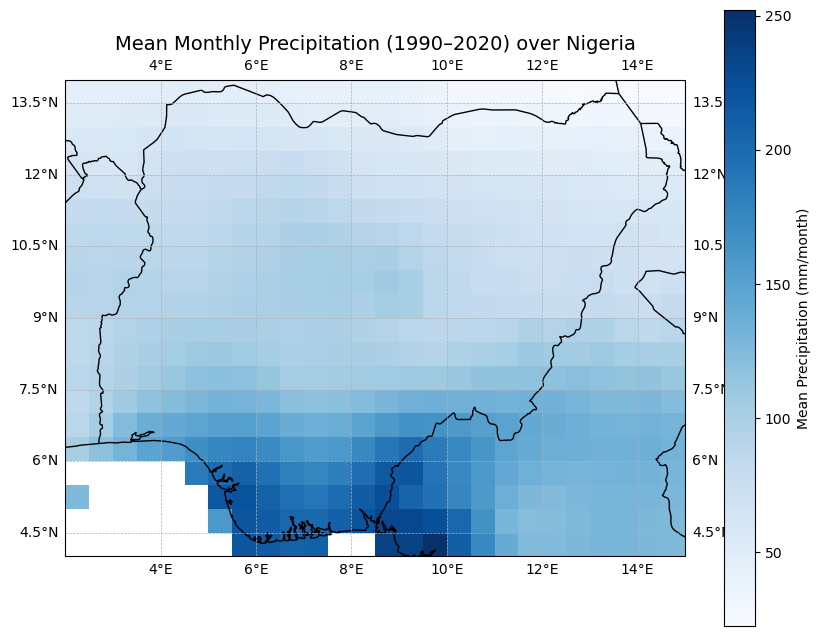

In [10]:
# 4. Plot map
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot precipitation
mean_pre.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Blues',
    cbar_kwargs={
        'label': 'Mean Precipitation (mm/month)'
    }
)

# Add geographic features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=1)

ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--')
ax.top_labels = False
ax.right_labels = False

ax.set_title("Mean Monthly Precipitation (1990–2020) over Nigeria", fontsize=14)

plt.show()


In [11]:
annual_total = nigeria['pre'].resample(time='Y').sum()

C:\Users\binta\anaconda3\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [12]:
annual_total

<xarray.DataArray 'pre' (time: 31, lat: 20, lon: 26)> Size: 64kB
array([[[   0.     ,    0.     ,    0.     , ..., 1754.4    ,
         1710.     , 1728.7    ],
        [   0.     ,    0.     ,    0.     , ..., 1812.3    ,
         1748.3    , 1712.     ],
        [1331.     ,    0.     ,    0.     , ..., 1714.8    ,
         1699.3    , 1664.5    ],
        ...,
        [ 593.9    ,  568.30005,  572.9    , ...,  316.5    ,
          298.9    ,  302.7    ],
        [ 526.9    ,  494.7    ,  508.30002, ...,  249.40001,
          231.40001,  221.5    ],
        [ 470.49997,  441.9    ,  456.2    , ...,  193.6    ,
          184.     ,  169.2    ]],

       [[   0.     ,    0.     ,    0.     , ..., 1566.5    ,
         1546.4    , 1561.1    ],
        [   0.     ,    0.     ,    0.     , ..., 1532.9    ,
         1555.6    , 1561.2001 ],
        [1616.8999 ,    0.     ,    0.     , ..., 1565.7999 ,
         1590.0001 , 1577.     ],
...
        [ 662.5    ,  645.2    ,  670.8    , ...,  497.9    ,
          482.1    ,  474.60004],
        [ 586.1    ,  581.7    ,  604.7001 , ...,  394.69998,
          367.1    ,  348.1    ],
        [ 510.1    ,  507.7    ,  519.2    , ...,  314.5    ,
          296.5    ,  283.80002]],

       [[   0.     ,    0.     ,    0.     , ..., 1597.8    ,
         1560.7    , 1557.9999 ],
        [   0.     ,    0.     ,    0.     , ..., 1584.1    ,
         1550.2001 , 1527.1001 ],
        [1304.9    ,    0.     ,    0.     , ..., 1569.3    ,
         1562.1001 , 1526.4    ],
        ...,
        [ 902.39996,  882.00006,  914.39996, ...,  551.     ,
          537.7    ,  536.2    ],
        [ 828.     ,  826.39996,  848.80005, ...,  456.09998,
          426.90002,  413.2    ],
        [ 754.7    ,  752.39996,  761.6    , ...,  380.     ,
          360.6    ,  345.09998]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 104B 2.25 2.75 3.25 3.75 ... 13.25 13.75 14.25 14.75
  * lat      (lat) float32 80B 4.25 4.75 5.25 5.75 ... 12.25 12.75 13.25 13.75
  * time     (time) datetime64[ns] 248B 1990-12-31 1991-12-31 ... 2020-12-31
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [13]:
annual_mean_series = annual_total.mean(dim=['lat', 'lon'])

In [14]:
years = annual_mean_series['time'].dt.year
precip_values = annual_mean_series.values

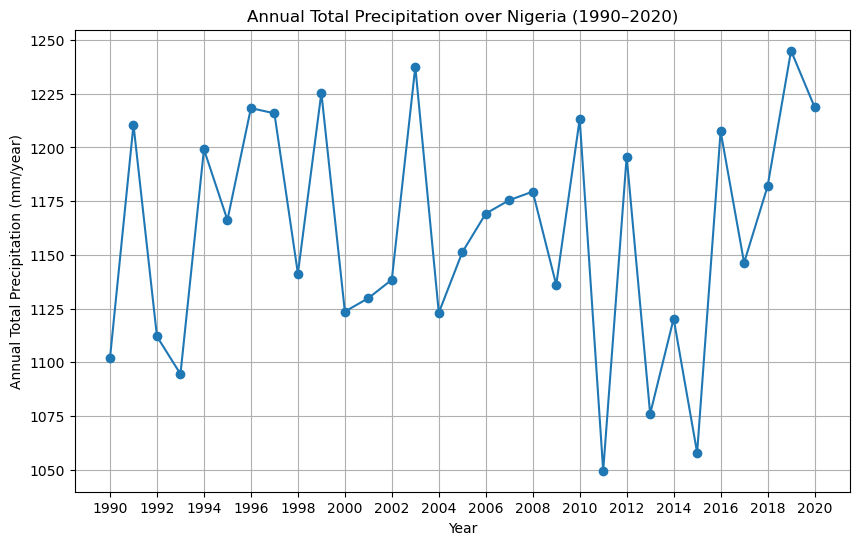

In [15]:
plt.figure(figsize=(10,6))

plt.plot(years, precip_values, marker='o')

plt.xticks(np.arange(years.min(), years.max()+1, 2))
plt.xlabel("Year")
plt.ylabel("Annual Total Precipitation (mm/year)")
plt.title("Annual Total Precipitation over Nigeria (1990–2020)")
plt.grid(True)

plt.show()


In [16]:
coefficients = np.polyfit(years, precip_values, 1)

slope = coefficients[0]
intercept = coefficients[1]

trend_line = slope * years + intercept


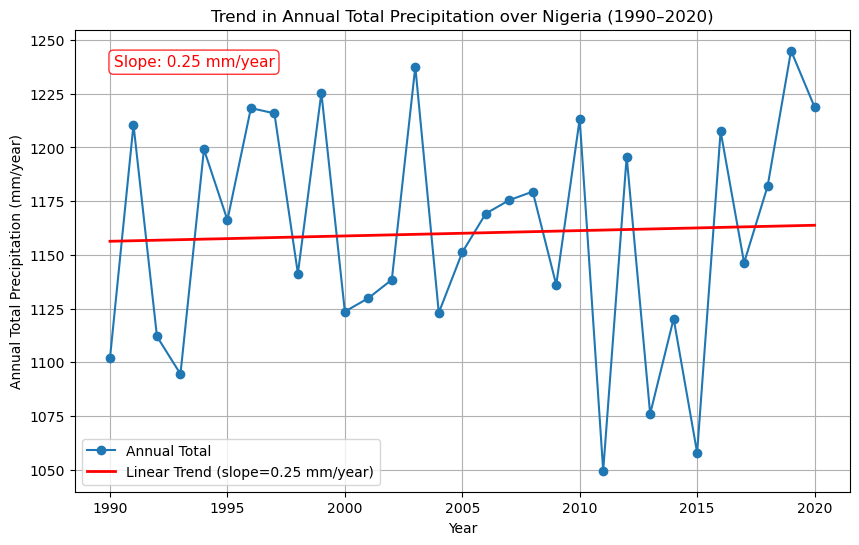

In [37]:
plt.figure(figsize=(10,6))
plt.plot(years, precip_values, marker='o', label='Annual Total')
plt.plot(years, trend_line, color='red', linewidth=2, label=f'Linear Trend (slope={slope:.2f} mm/year)')
plt.xlabel("Year")
plt.ylabel("Annual Total Precipitation (mm/year)")
plt.title("Trend in Annual Total Precipitation over Nigeria (1990–2020)")
plt.legend()
plt.grid(True)

# Add slope annotation to the plot
plt.annotate(f'Slope: {slope:.2f} mm/year',
             xy=(0.05, 0.92),
             xycoords='axes fraction',
             fontsize=11,
             color='red',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.8))

plt.show()

In [18]:
print("Slope (mm/year per year):", slope)
print("Trend per decade (mm/year):", slope * 10)


Slope (mm/year per year): 0.24860726633377211
Trend per decade (mm/year): 2.4860726633377213


In [19]:
std_dev = annual_mean_series.std()
print("Standard Deviation (mm/year):", std_dev.values)


Standard Deviation (mm/year): 52.56526184082031


In [20]:
annual_total = nigeria['pre'].resample(time='Y').sum()


C:\Users\binta\anaconda3\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [21]:
decade1 = annual_total.sel(time=slice("1990", "1999")).mean(dim='time')


In [22]:
decade2 = annual_total.sel(time=slice("2010", "2020")).mean(dim='time')


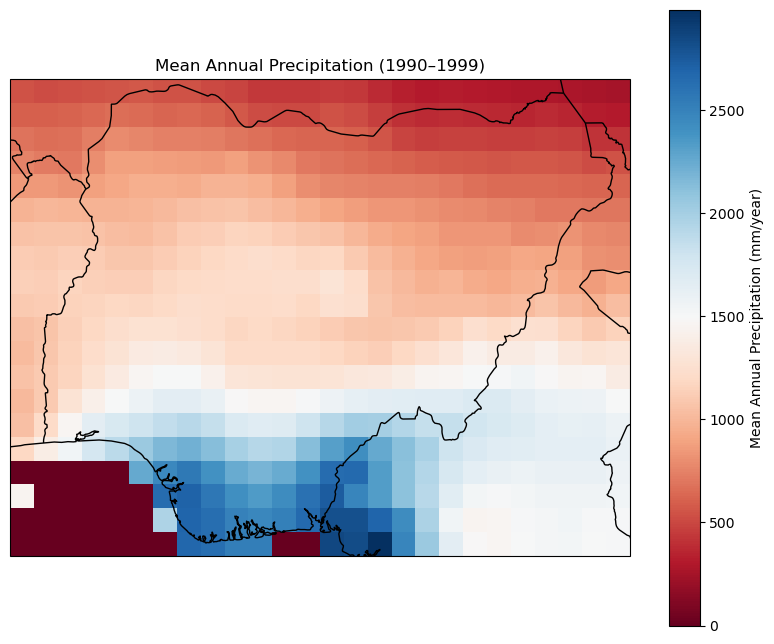

In [38]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

decade1.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu',
    cbar_kwargs={'label': 'Mean Annual Precipitation (mm/year)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Mean Annual Precipitation (1990–1999)")

plt.show()


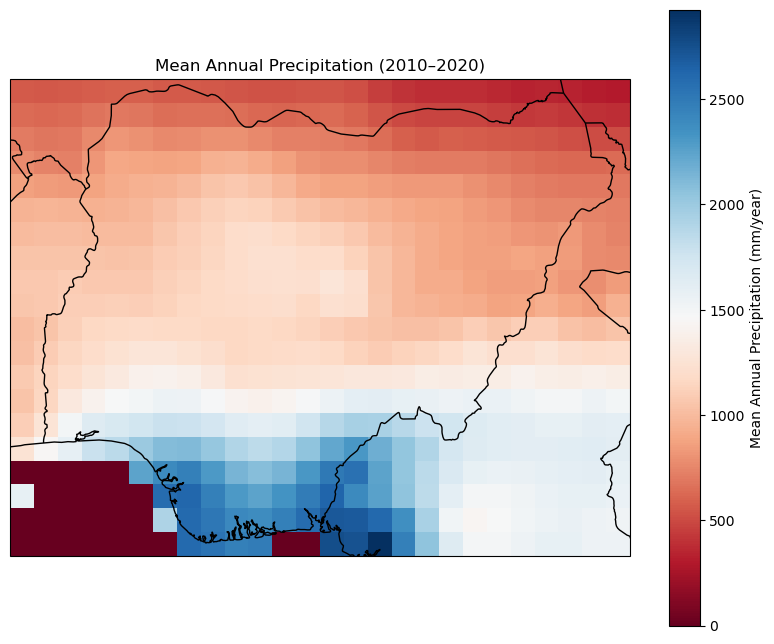

In [39]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

decade2.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu',
    cbar_kwargs={'label': 'Mean Annual Precipitation (mm/year)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Mean Annual Precipitation (2010–2020)")

plt.show()


In [25]:
difference = decade2 - decade1


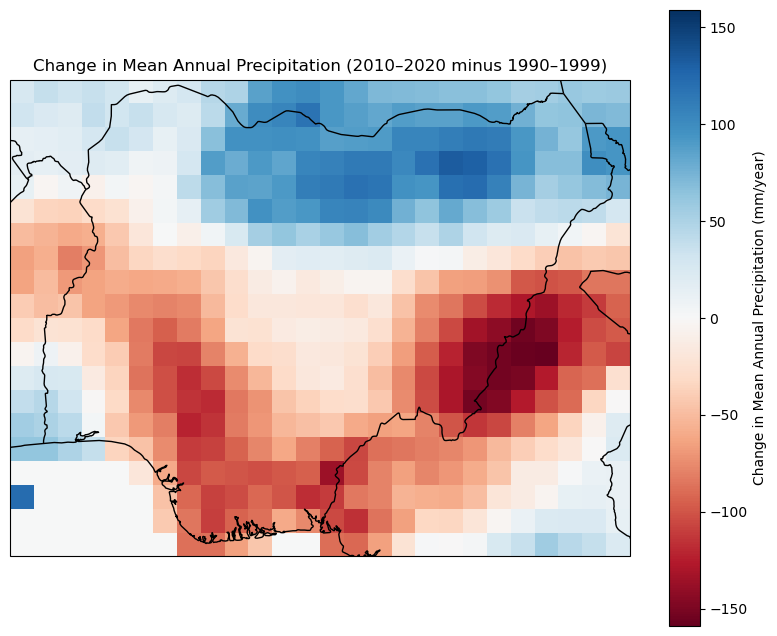

In [41]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

difference.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu',
    cbar_kwargs={'label': 'Change in Mean Annual Precipitation (mm/year)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Change in Mean Annual Precipitation (2010–2020 minus 1990–1999)")
plt.savefig("Picture_1.png", dpi=300)
plt.show()


In [27]:
diff_flat = difference.stack(points=("lat", "lon"))


In [28]:
top_increase = diff_flat.sortby(diff_flat, ascending=False).isel(points=slice(0,5))


In [29]:
top_decrease = diff_flat.sortby(diff_flat).isel(points=slice(0,5))


In [30]:
increase_table = top_increase.reset_index("points").to_dataframe(name="Change_mm_per_year")
decrease_table = top_decrease.reset_index("points").to_dataframe(name="Change_mm_per_year")

print("Top 5 Increases")
print(increase_table)

print("\nTop 5 Decreases")
print(decrease_table)


Top 5 Increases
          lat    lon  Change_mm_per_year
points                                  
0       12.25  11.25          132.465454
1       12.25  11.75          129.954529
2        5.25   2.25          122.590088
3       11.75  11.75          121.661865
4       11.75  11.25          120.066284

Top 5 Decreases
         lat    lon  Change_mm_per_year
points                                 
0       8.25  13.25         -158.808350
1       8.25  12.75         -156.584473
2       8.75  12.75         -154.555420
3       7.75  12.25         -153.705444
4       7.25  11.75         -153.294678


In [31]:
annual_total = nigeria['pre'].resample(time='Y').sum()


C:\Users\binta\anaconda3\Lib\site-packages\xarray\groupers.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [32]:
p90 = annual_total.quantile(0.9, dim='time')

In [33]:
wet_years = annual_total > p90

In [34]:
wet_frequency = wet_years.sum(dim='time')

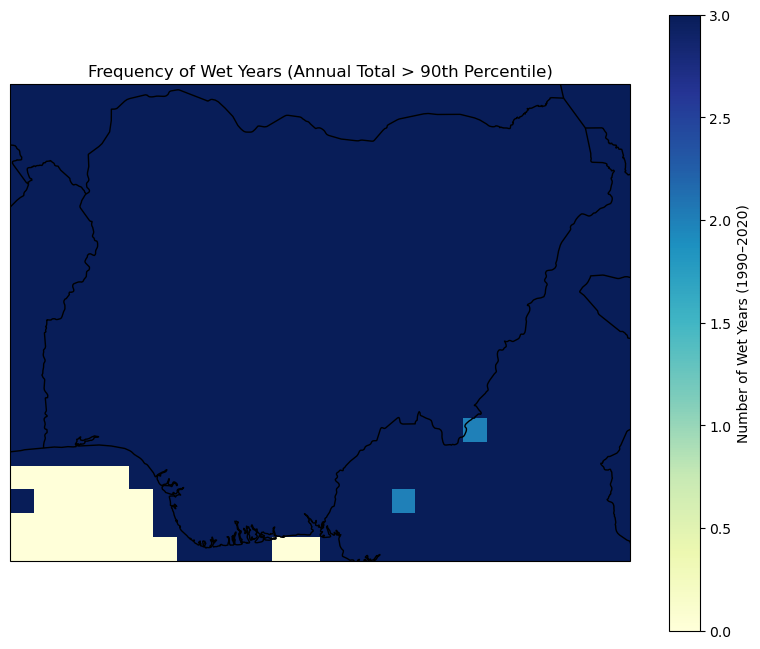

In [35]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

wet_frequency.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='YlGnBu',
    cbar_kwargs={'label': 'Number of Wet Years (1990–2020)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Frequency of Wet Years (Annual Total > 90th Percentile)")

plt.show()